# Download the Dataset

Download the Dataset from the following link: https://www.kaggle.com/felixzhao/productdemandforecasting

# Read the Dataset
Read the dataset into a Pandas Dataframe.

Does the dataset include any missing values? If so, drop them.

Hint: Pandas can do that with one line of code!

In [1]:
import pandas as pd

df = pd.read_csv('Historical Product Demand.csv')

print('Shape:', str(df.shape))
df.dropna()
print('Shape after dropping missing values:', str(df.shape))
print(df.head(10))


Shape: (1048575, 5)
Shape after dropping missing values: (1048575, 5)
   Product_Code Warehouse Product_Category       Date Order_Demand
0  Product_0993    Whse_J     Category_028  2012/7/27         100 
1  Product_0979    Whse_J     Category_028  2012/1/19         500 
2  Product_0979    Whse_J     Category_028   2012/2/3         500 
3  Product_0979    Whse_J     Category_028   2012/2/9         500 
4  Product_0979    Whse_J     Category_028   2012/3/2         500 
5  Product_0979    Whse_J     Category_028  2012/4/19         500 
6  Product_0979    Whse_J     Category_028   2012/6/5         500 
7  Product_0979    Whse_J     Category_028  2012/6/27         500 
8  Product_0979    Whse_J     Category_028  2012/7/23         500 
9  Product_0979    Whse_J     Category_028  2012/8/29         500 


# Extract Features
Exclude the region and date from the considered features.

Hint: You can choose to use all the features.

In [2]:
df.drop(["Warehouse","Date"], axis=1, inplace=True)

df

,Product_Code,Product_Category,Order_Demand
0,Product_0993,Category_028,100
1,Product_0979,Category_028,500
2,Product_0979,Category_028,500
3,Product_0979,Category_028,500
4,Product_0979,Category_028,500
...,...,...,...
1048570,Product_1791,Category_006,1000
1048571,Product_1974,Category_006,1
1048572,Product_1787,Category_006,2500
1048573,Product_0901,Category_023,50


# Perform Preprocessing
Perform any needed pre-processing on the chosen features including:
- Scaling.
- Encoding.
- Dealing with Nan values.

Hint: Use only the preprocessing steps you think are useful.

In [3]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df["Product_Code"] = encoder.fit_transform(df["Product_Code"])
df["Product_Category"] = encoder.fit_transform(df["Product_Category"])

from sklearn.preprocessing import StandardScaler
features = ["Product_Code","Product_Category"]
X = df[features]

y = df[["Order_Demand"]].replace({'\(':'-', '\)':''}, regex=True).astype(float)

scaler = StandardScaler()
X = scaler.fit_transform(X)

print(X)
print(y)



<>:11: SyntaxWarning: invalid escape sequence '\('
<>:11: SyntaxWarning: invalid escape sequence '\)'
<>:11: SyntaxWarning: invalid escape sequence '\('
<>:11: SyntaxWarning: invalid escape sequence '\)'
C:\Users\jcollins\AppData\Local\Temp\ipykernel_40804\2175972584.py:11: SyntaxWarning: invalid escape sequence '\('
  y = df[["Order_Demand"]].replace({'\(':'-', '\)':''}, regex=True).astype(float)
C:\Users\jcollins\AppData\Local\Temp\ipykernel_40804\2175972584.py:11: SyntaxWarning: invalid escape sequence '\)'
  y = df[["Order_Demand"]].replace({'\(':'-', '\)':''}, regex=True).astype(float)


[[-0.22473278  1.65123264]
 [-0.24931393  1.65123264]
 [-0.24931393  1.65123264]
 ...
 [ 1.16936999 -1.12831219]
 [-0.3862661   1.01951791]
 [-0.71460012 -1.76002692]]
         Order_Demand
0               100.0
1               500.0
2               500.0
3               500.0
4               500.0
...               ...
1048570        1000.0
1048571           1.0
1048572        2500.0
1048573          50.0
1048574           4.0

[1048575 rows x 1 columns]


# Split the Data

Split your data as follows:
- 80% training set
- 10% validation set
- 10% test set

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_validate, X_test, y_validate, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0)

print('len(X_train):', len(X_train))
print('len(y_train):', len(y_train))
print('len(X_test):', len(X_test))
print('len(y_test):', len(y_test))
print('len(X_validate):', len(X_validate))
print('len(y_validate):', len(y_validate))



len(X_train): 838860
len(y_train): 838860
len(X_test): 104858
len(y_test): 104858
len(X_validate): 104857
len(y_validate): 104857


# Training K-Nearest Neighbor (KNN) Regression

Use a KNN regressor model to train your data.

Choose the best k for the KNN algorithm by trying different values and validating performance on the validation set.

Regression Metrics

Print the R-squared score of your final KNN regressor.

In [5]:
from sklearn.neighbors import KNeighborsRegressor

# K = 8
# model = KNeighborsRegressor(n_neighbors=K)
# model.fit(X_train, y_train)
# score = model.score(X_test, y_test)

# print('Score before optimizing K:',score)

bestK = 1
scores = []
bestScore = 0


krange = range(1, 100)
for i in krange:
    KNRmodel = KNeighborsRegressor(n_neighbors=i)
    KNRmodel.fit(X_train, y_train)
    KNRscore = KNRmodel.score(X_test, y_test)
    scores.append(KNRscore)
    if KNRscore > bestScore:
        bestScore = KNRscore
        bestK = i

print('Best K:', bestK)
print('Best Score:', bestScore)

    





Best K: 83
Best Score: 0.15619740766217638


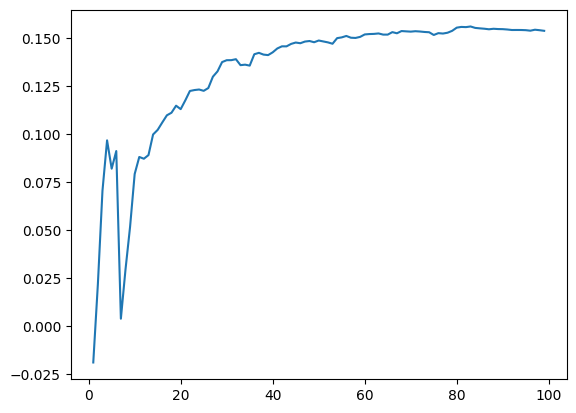

In [8]:
import matplotlib.pyplot as plt

plt.plot(krange, scores)

In [10]:
K = 83
model = KNeighborsRegressor(n_neighbors=K)
model.fit(X_train, y_train)
score = model.score(X_test, y_test)

y_pred = model.predict(X_validate)

from sklearn.metrics import mean_squared_error

print('Accuracy:', score)
print('MSE:',mean_squared_error(y_validate, y_pred))


Accuracy: 0.15619740766217638
MSE: 668804742.4604971
